In [1]:
import pandas as pd
import missingno as msno 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance_claims.csv')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
df[df.columns]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [6]:
for features in df.columns:
#    n=len(df[features].unique())
    n = len(df[features].unique())
    print(features,' - ',n)
    

months_as_customer  -  391
age  -  46
policy_number  -  1000
policy_bind_date  -  951
policy_state  -  3
policy_csl  -  3
policy_deductable  -  3
policy_annual_premium  -  991
umbrella_limit  -  11
insured_zip  -  995
insured_sex  -  2
insured_education_level  -  7
insured_occupation  -  14
insured_hobbies  -  20
insured_relationship  -  6
capital-gains  -  338
capital-loss  -  354
incident_date  -  60
incident_type  -  4
collision_type  -  4
incident_severity  -  4
authorities_contacted  -  5
incident_state  -  7
incident_city  -  7
incident_location  -  1000
incident_hour_of_the_day  -  24
number_of_vehicles_involved  -  4
property_damage  -  3
bodily_injuries  -  3
witnesses  -  4
police_report_available  -  3
total_claim_amount  -  763
injury_claim  -  638
property_claim  -  626
vehicle_claim  -  726
auto_make  -  14
auto_model  -  39
auto_year  -  21
fraud_reported  -  2


In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


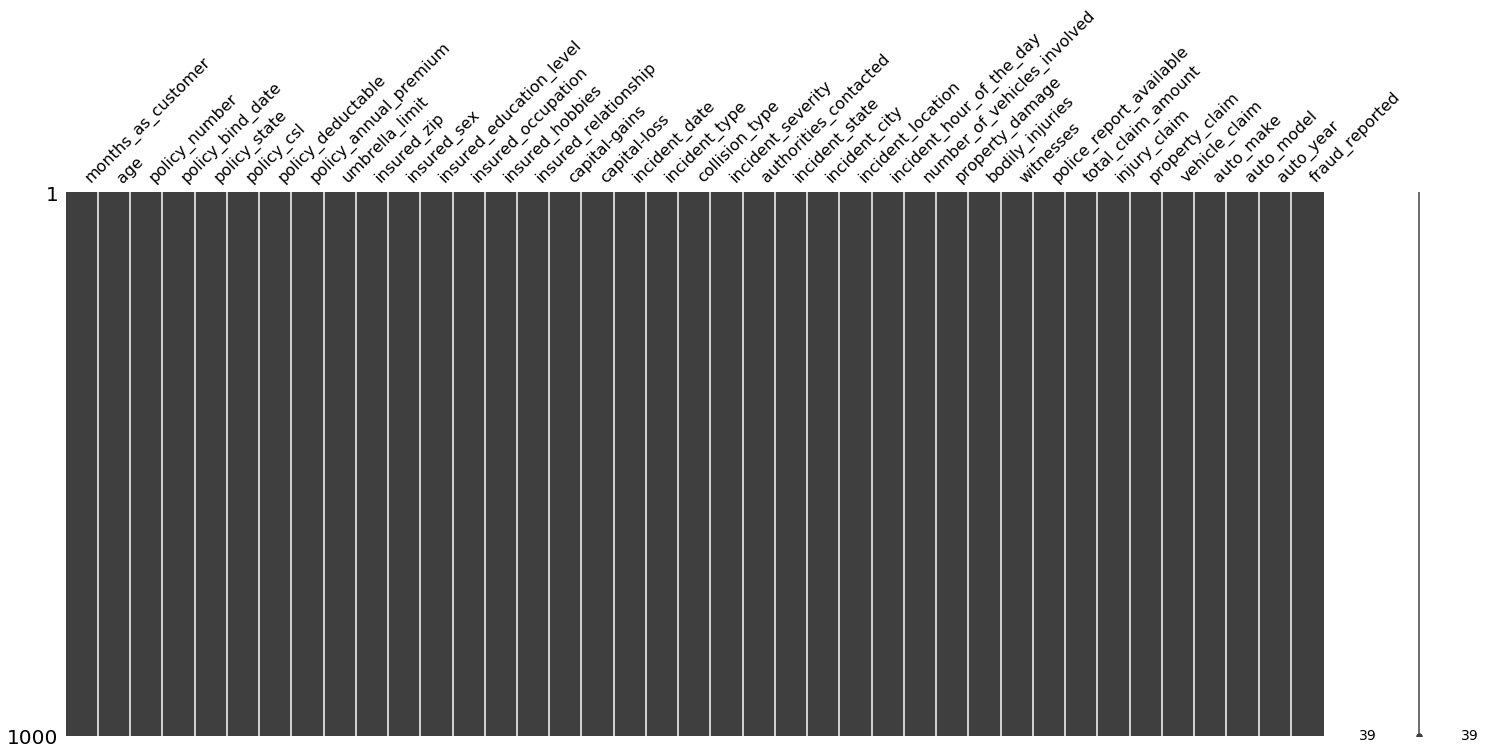

In [8]:
msno.matrix(df) 

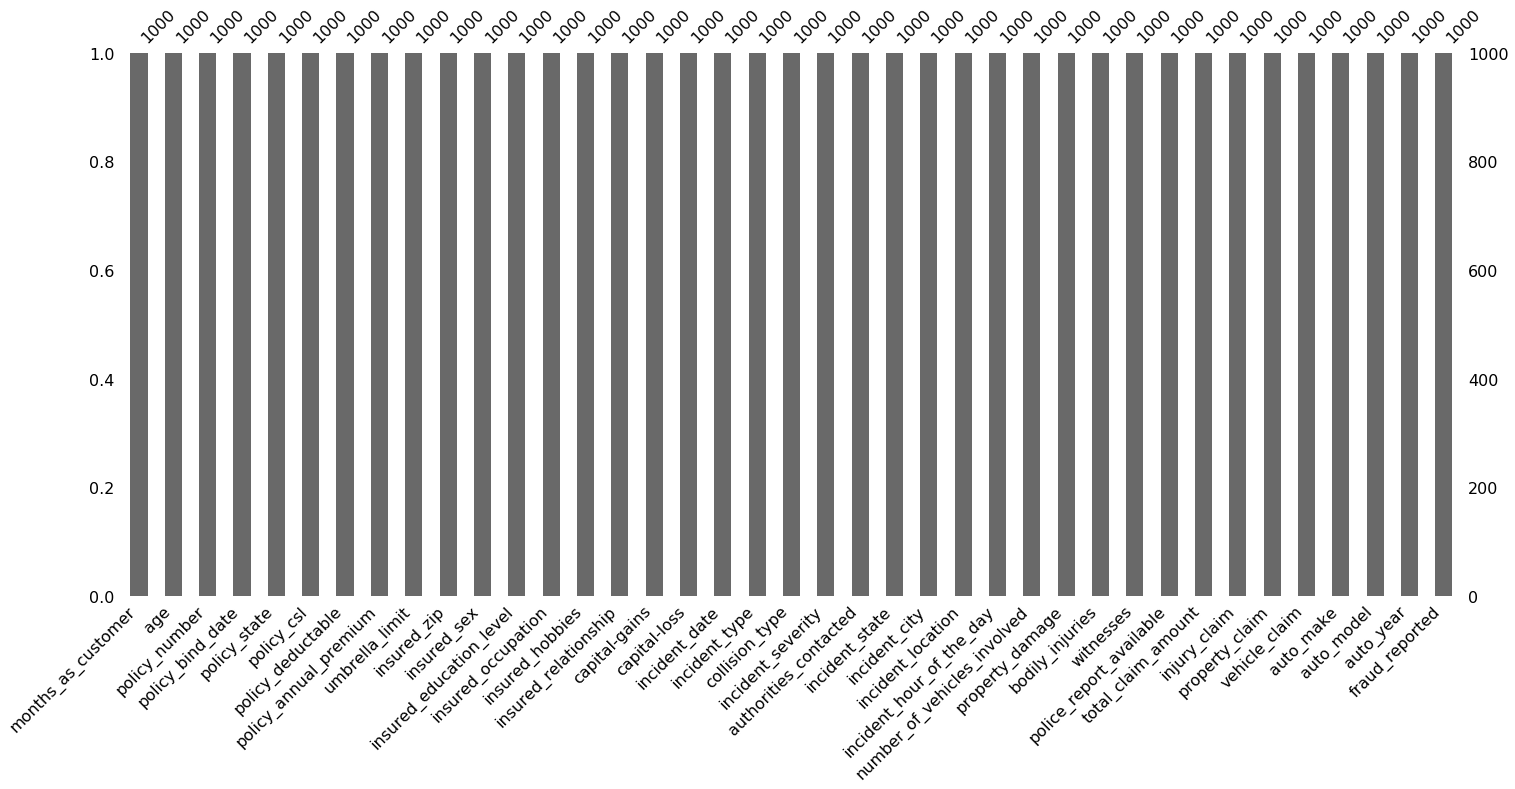

In [9]:
msno.bar(df) 

In [10]:
df.shape

(1000, 39)

In [11]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [12]:
df.columns.dtype

dtype('O')

#Dropping the Policy Number Column

In [13]:
df.drop('policy_number',axis ='columns',inplace=True)

In [14]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [15]:
df.shape

(1000, 38)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

# Exploratory Data Analysis

In Data Analysis We will Analyze To Find out the below stuff
Missing Values

All The Numerical Variables

Distribution of the Numerical Variables

Categorical Variables

Cardinality of Categorical Variables

Outliers

Relationship between independent and dependent feature(SalePrice)

In [17]:
df.isnull()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# This is to Identify any Missing Value or any alpha numeric or signed Character in the Dataset

In [18]:
df.isnull().any()

months_as_customer             False
age                            False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
b

In [19]:
for i in df.columns:
    print(i," - ",df[i].unique())

months_as_customer  -  [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162

In [20]:
df["police_report_available"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [21]:
df["property_damage"].unique()

array(['YES', '?', 'NO'], dtype=object)

In [22]:
df["collision_type"].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [23]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

#Replace the "?" with NaN

In [24]:
df["police_report_available"] = df["police_report_available"].replace('?',np.NaN)
df["police_report_available"].unique()

array(['YES', nan, 'NO'], dtype=object)

In [25]:
df["property_damage"]=df["property_damage"].replace('?',np.NaN)

In [26]:
df["property_damage"]

0      YES
1      NaN
2       NO
3      NaN
4       NO
      ... 
995    YES
996    YES
997    NaN
998    NaN
999    NaN
Name: property_damage, Length: 1000, dtype: object

In [27]:
df["collision_type"] = df["collision_type"].replace('?',np.NaN)
df["collision_type"].unique()

array(['Side Collision', nan, 'Rear Collision', 'Front Collision'],
      dtype=object)

# This is to Check the NaN values of Columns

In [28]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

In [29]:
print(features_with_na)

['collision_type', 'property_damage', 'police_report_available']


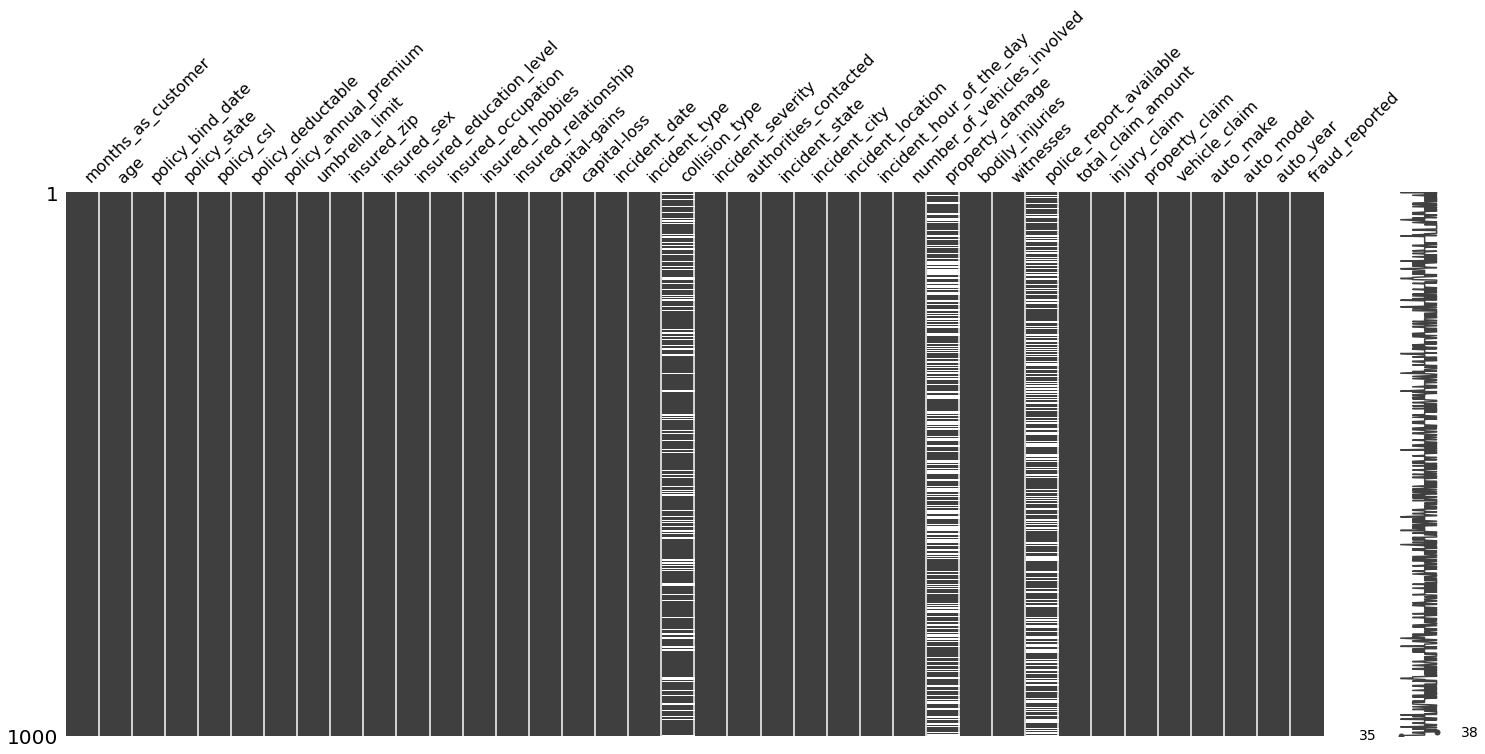

In [30]:
msno.matrix(df)

In [31]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [32]:
df["collision_type"] = df["collision_type"].replace(np.NaN,'Rear Collision')
df["collision_type"].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [33]:
df["collision_type"].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

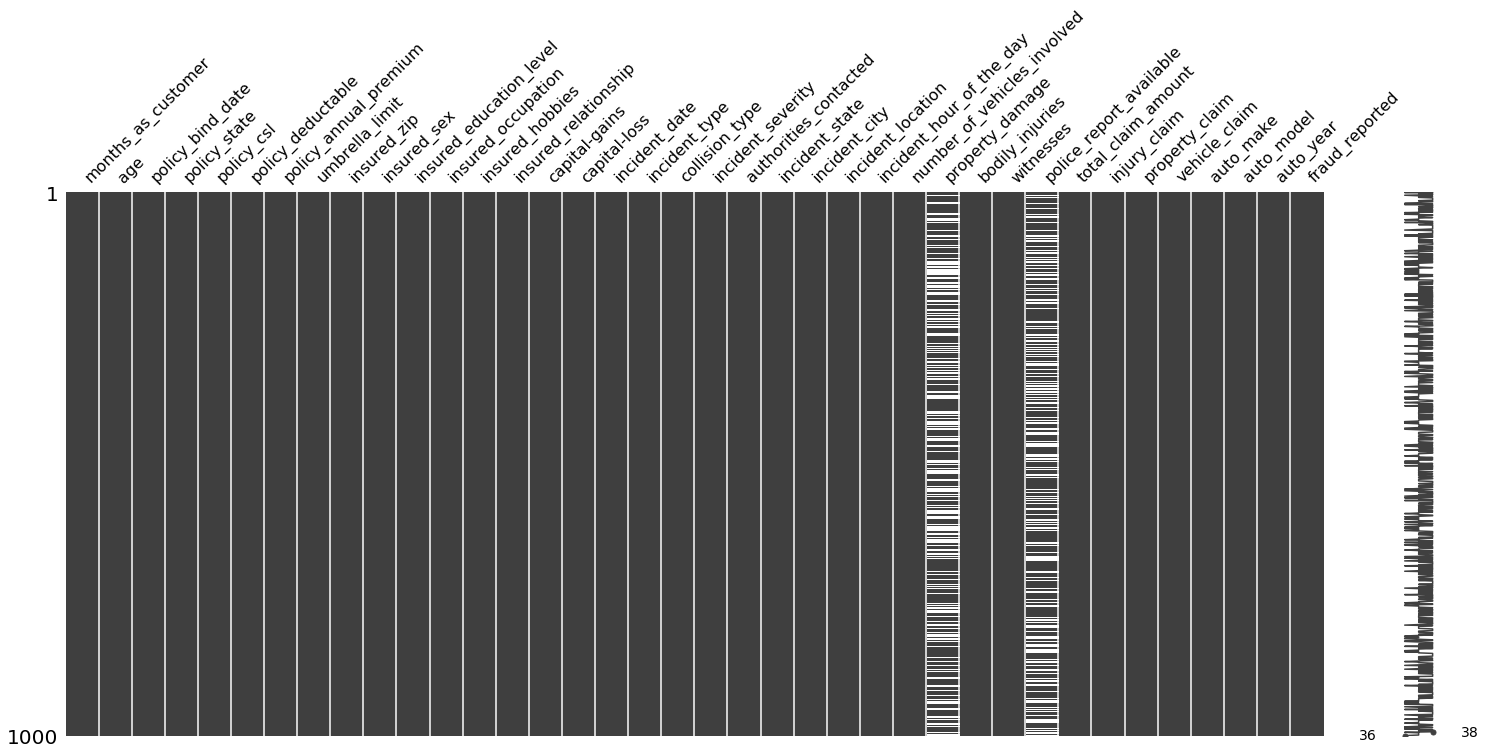

In [34]:
msno.matrix(df)

In [35]:
df["property_damage"].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [36]:
df["property_damage"] = df["property_damage"].replace(np.NaN,'NO')
df["property_damage"].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

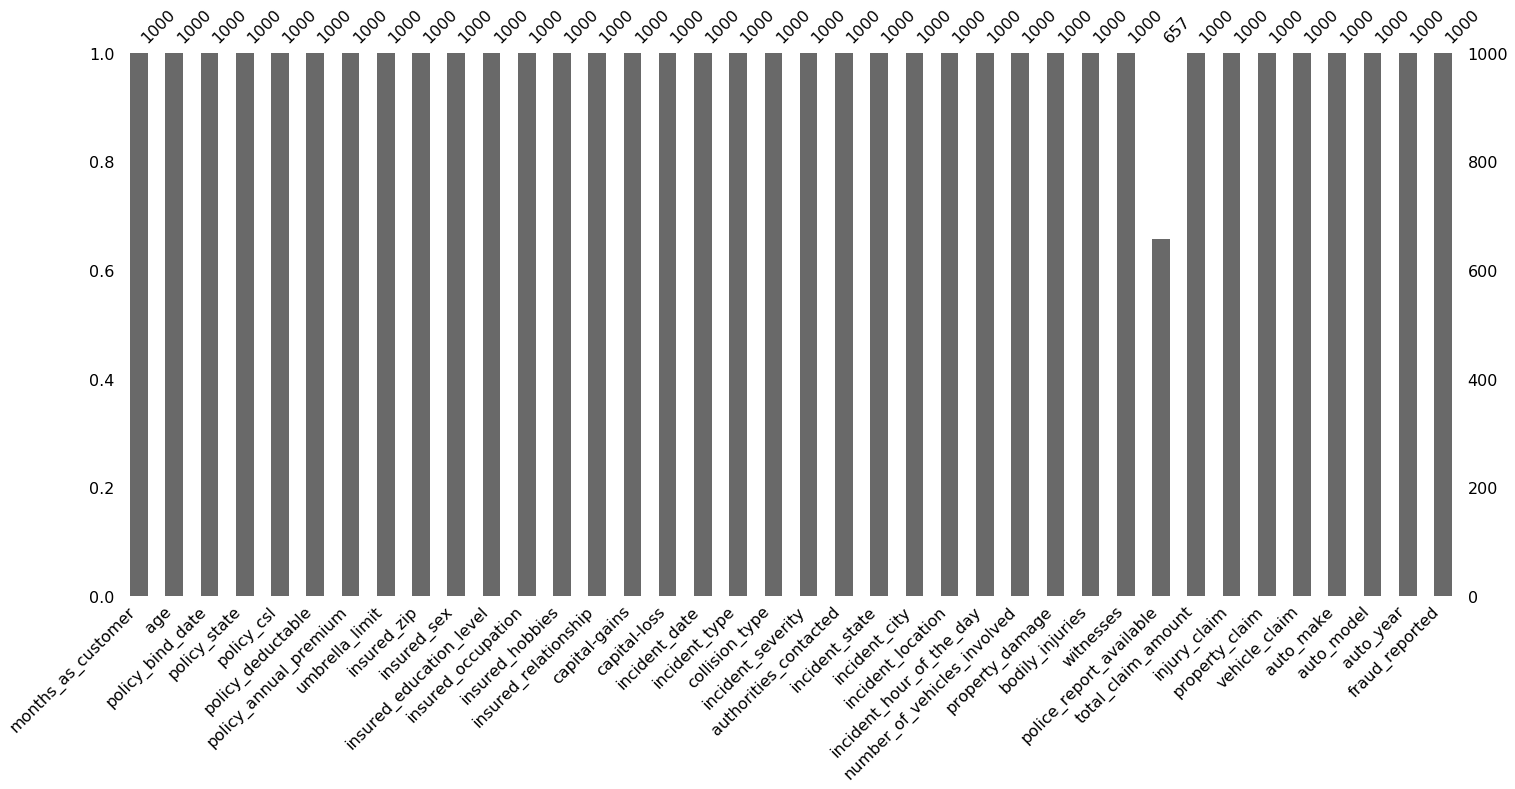

In [37]:
msno.bar(df)

In [38]:
df["police_report_available"].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [39]:
df["police_report_available"] = df["police_report_available"].replace(np.NaN,"NO")
df["police_report_available"].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

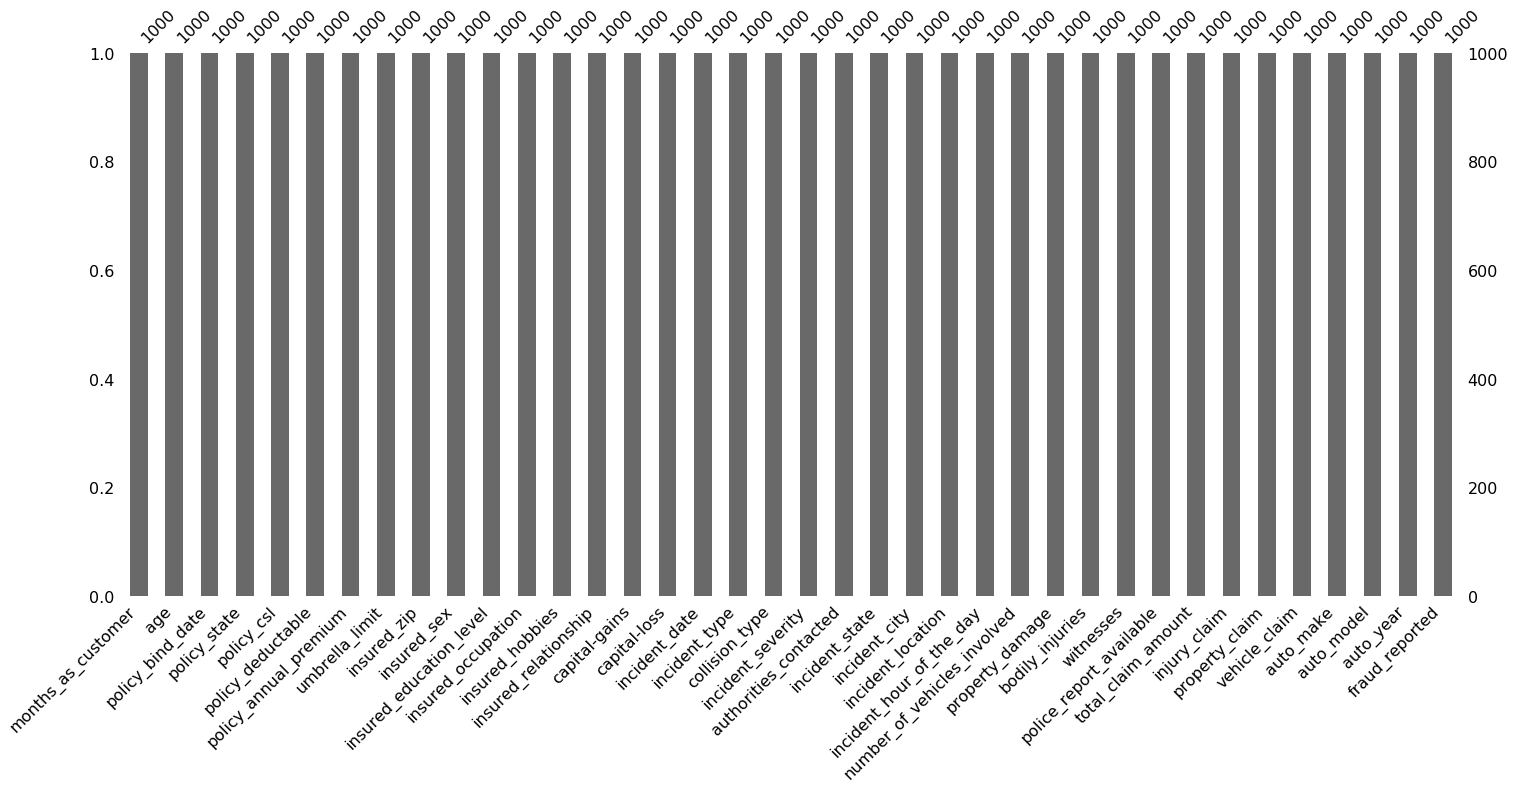

In [40]:
msno.bar(df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

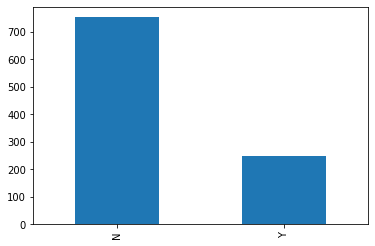

In [42]:
df['fraud_reported'].value_counts().plot(kind='bar')

In [43]:
df['incident_state'].value_counts()

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64

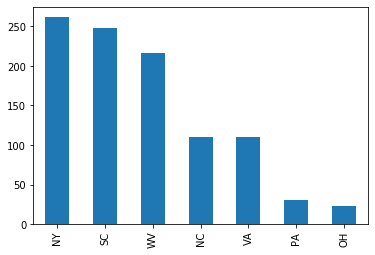

In [44]:
df['incident_state'].value_counts().plot(kind='bar')

In [45]:
df['fraud_reported'].nunique()

2

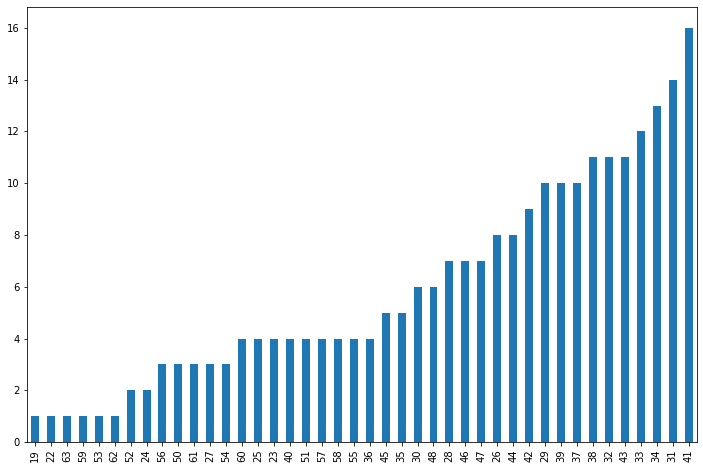

In [46]:
plt.figure(figsize=(12,8))

df[df.fraud_reported=='Y'].age.value_counts().sort_values(ascending=True).plot(kind='bar')

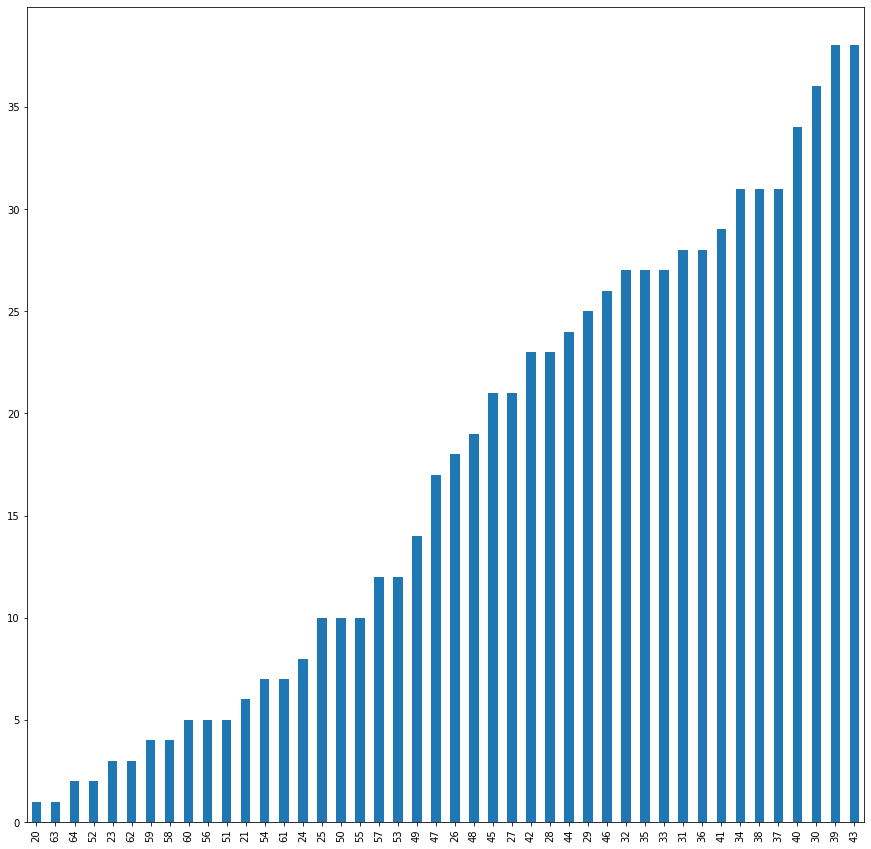

In [47]:
plt.figure(figsize=(15,15))

df.age[df.fraud_reported=='N'].value_counts().sort_values(ascending=True).plot(kind='bar')

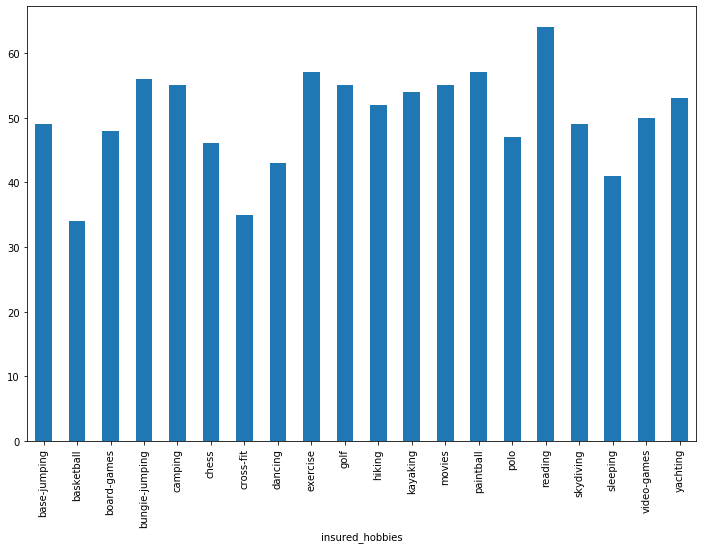

In [48]:
plt.figure(figsize=(12,8))

df.groupby('insured_hobbies')['total_claim_amount'].count().plot(kind='bar')

From this graph we can see that People having hobby as 'Reading' highest Insurance claim

# Data processing and Feature engineering

# Encode Fraud Reported field

In [49]:
df['fraud_reported'].replace('Y','1',inplace=True)
df['fraud_reported'].replace('N','0',inplace=True)

df['fraud_reported']

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: object

In [50]:
df['insured_zip']=df['insured_zip'].astype(object)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   object 
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [52]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [53]:
df.describe(include='all')

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000,1000,1000,1000.000000,1000.000000,1.000000e+03,1000.0,1000,...,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000
unique,NaN,NaN,951,3,3,NaN,NaN,NaN,995.0,2,...,NaN,2,NaN,NaN,NaN,NaN,14,39,NaN,2
top,NaN,NaN,05-08-1992,OH,250/500,NaN,NaN,NaN,431202.0,FEMALE,...,NaN,NO,NaN,NaN,NaN,NaN,Suburu,RAM,NaN,0
freq,NaN,NaN,3,352,351,NaN,NaN,NaN,2.0,537,...,NaN,686,NaN,NaN,NaN,NaN,80,43,NaN,753
mean,203.954000,38.948000,NaN,NaN,NaN,1136.000000,1256.406150,1.101000e+06,NaN,NaN,...,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,2005.103000,NaN
std,115.113174,9.140287,NaN,NaN,NaN,611.864673,244.167395,2.297407e+06,NaN,NaN,...,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,6.015861,NaN
min,0.000000,19.000000,NaN,NaN,NaN,500.000000,433.330000,-1.000000e+06,NaN,NaN,...,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,1995.000000,NaN
25%,115.750000,32.000000,NaN,NaN,NaN,500.000000,1089.607500,0.000000e+00,NaN,NaN,...,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,2000.000000,NaN
50%,199.500000,38.000000,NaN,NaN,NaN,1000.000000,1257.200000,0.000000e+00,NaN,NaN,...,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,2005.000000,NaN
75%,276.250000,44.000000,NaN,NaN,NaN,2000.000000,1415.695000,0.000000e+00,NaN,NaN,...,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,2010.000000,NaN


We could see a lot of NaN Variables. We will explore those Categorical Variables.

# Policy CSL 

CSL is Combined Single Limit.

In [54]:
df['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [55]:
df['csl_per_person']=df['policy_csl'].str.split('/',expand=True)[0]

In [56]:
df['csl_per_accident']=df['policy_csl'].str.split('/',expand=True)[1]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   object 
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

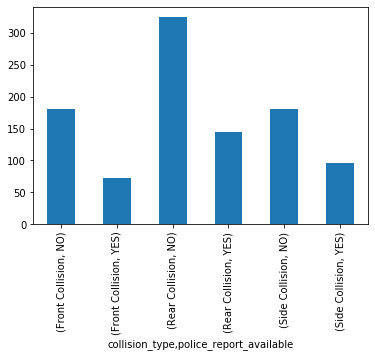

In [58]:
df.groupby('collision_type')['police_report_available'].value_counts().plot(kind='bar')

# Numerical Variables

In [59]:

# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  16


,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
0,328,48,1000,1406.91,0,53300,0,5,1,1,2,71610,6510,13020,52080,2004
1,228,42,2000,1197.22,5000000,0,0,8,1,0,0,5070,780,780,3510,2007
2,134,29,2000,1413.14,5000000,35100,0,7,3,2,3,34650,7700,3850,23100,2007
3,256,41,2000,1415.74,6000000,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014
4,228,44,1000,1583.91,6000000,66000,-46000,20,1,0,1,6500,1300,650,4550,2009


In [60]:
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   capital-gains                1000 non-null   int64  
 6   capital-loss                 1000 non-null   int64  
 7   incident_hour_of_the_day     1000 non-null   int64  
 8   number_of_vehicles_involved  1000 non-null   int64  
 9   bodily_injuries              1000 non-null   int64  
 10  witnesses                    1000 non-null   int64  
 11  total_claim_amount           1000 non-null   int64  
 12  injury_claim                 1000 non-null   int64  
 13  property_claim     

In [61]:
df[numerical_features].columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

Finding Correlation among Numerical Features 

In [62]:
corr_numerical_feature=df[numerical_features].corr()


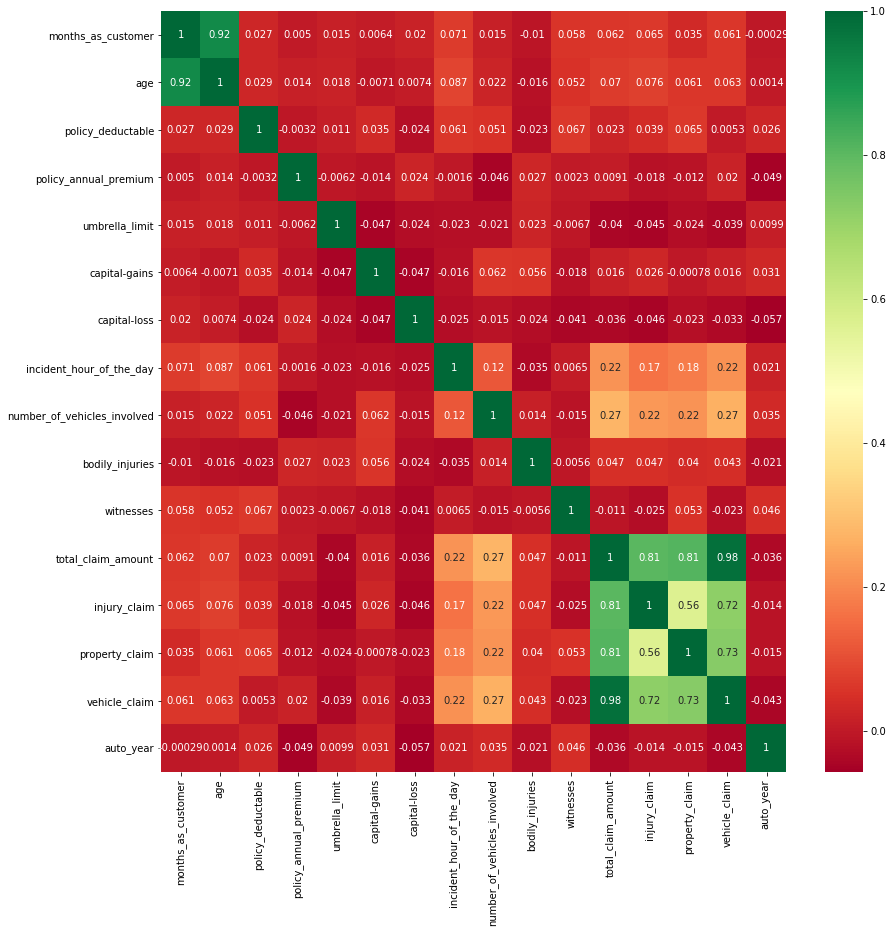

In [63]:
#heat_map = sns.heatmap(corr_numerical_feature,annot=True,cmap="YlGnBu",linewidths=2)
fig, ax = plt.subplots(figsize=(14,14))
heat_map = sns.heatmap(corr_numerical_feature,annot=True,cmap="RdYlGn",ax=ax)

# Temporal Variables(Eg: Datetime Variables)¶


In [64]:

# list of variables that contain year information
year_feature = [feature for feature in df.columns if 'Yr' in feature or 'Year' in feature or 'year' in feature or 'date' in feature]

year_feature

['policy_bind_date', 'incident_date', 'auto_year']

In [65]:
print(len(year_feature))

3


In [66]:
df[year_feature].head()

,policy_bind_date,incident_date,auto_year
0,17-10-2014,25-01-2015,2004
1,27-06-2006,21-01-2015,2007
2,06-09-2000,22-02-2015,2007
3,25-05-1990,10-01-2015,2014
4,06-06-2014,17-02-2015,2009


# Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

In [67]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<40 and feature not in year_feature]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


In [68]:
df[discrete_feature].head()

,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses
0,1000,0,5,1,1,2
1,2000,5000000,8,1,0,0
2,2000,5000000,7,3,2,3
3,2000,6000000,5,1,1,2
4,1000,6000000,20,1,0,1


In [69]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]
print("Continuous Variables Count: {}".format(len(continuous_feature)))

Continuous Variables Count: 9


In [70]:
df[continuous_feature].head()

,months_as_customer,age,policy_annual_premium,capital-gains,capital-loss,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,328,48,1406.91,53300,0,71610,6510,13020,52080
1,228,42,1197.22,0,0,5070,780,780,3510
2,134,29,1413.14,35100,0,34650,7700,3850,23100
3,256,41,1415.74,48900,-62400,63400,6340,6340,50720
4,228,44,1583.91,66000,-46000,6500,1300,650,4550


# Categorical Variables

In [71]:
categorical_features=[feature for feature in df.columns if feature not in numerical_features + year_feature]
categorical_features

['policy_state',
 'policy_csl',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'csl_per_person',
 'csl_per_accident']

In [72]:
df[categorical_features].shape

(1000, 22)

In [73]:
df[categorical_features].head()

,policy_state,policy_csl,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,...,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident
0,OH,250/500,466132,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,...,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,1,250,500
1,IN,250/500,468176,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,Rear Collision,...,VA,Riverwood,6608 MLK Hwy,NO,NO,Mercedes,E400,1,250,500
2,OH,100/300,430632,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,...,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,0,100,300
3,IL,250/500,608117,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,...,OH,Arlington,6956 Maple Drive,NO,NO,Chevrolet,Tahoe,1,250,500
4,IL,500/1000,610706,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,Rear Collision,...,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,0,500,1000


In [74]:

for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is policy_state and number of categories are 3
The feature is policy_csl and number of categories are 3
The feature is insured_zip and number of categories are 995
The feature is insured_sex and number of categories are 2
The feature is insured_education_level and number of categories are 7
The feature is insured_occupation and number of categories are 14
The feature is insured_hobbies and number of categories are 20
The feature is insured_relationship and number of categories are 6
The feature is incident_type and number of categories are 4
The feature is collision_type and number of categories are 3
The feature is incident_severity and number of categories are 4
The feature is authorities_contacted and number of categories are 5
The feature is incident_state and number of categories are 7
The feature is incident_city and number of categories are 7
The feature is incident_location and number of categories are 1000
The feature is property_damage and number of categories are

In [75]:
for features in categorical_features:
#    n=len(df[features].unique())
    n = len(df[features].unique())
    print(features,' - ',n)
    

policy_state  -  3
policy_csl  -  3
insured_zip  -  995
insured_sex  -  2
insured_education_level  -  7
insured_occupation  -  14
insured_hobbies  -  20
insured_relationship  -  6
incident_type  -  4
collision_type  -  3
incident_severity  -  4
authorities_contacted  -  5
incident_state  -  7
incident_city  -  7
incident_location  -  1000
property_damage  -  2
police_report_available  -  2
auto_make  -  14
auto_model  -  39
fraud_reported  -  2
csl_per_person  -  3
csl_per_accident  -  3


In [76]:
# Dropping Insured Zip

df['insured_zip'].nunique()

df.drop('insured_zip',axis ='columns',inplace=True)

In [77]:
df.drop('incident_location',axis='columns',inplace=True)

In [78]:
df['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [79]:
df['policy_state'].unique()

df['policy_state'].replace('OH',0,inplace=True)
df['policy_state'].replace('IN',1,inplace=True)
df['policy_state'].replace('IL',2,inplace=True)

In [80]:
df['fraud_reported'].replace('1',1,inplace=True)
df['fraud_reported'].replace('0',0,inplace=True)

df['fraud_reported']

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [81]:
df[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
0,0,0.258523
1,1,0.254839
2,2,0.227811


In [82]:
df['policy_state'] = df['policy_state'].replace(0,0.258,inplace=True)
df['policy_state'] = df['policy_state'].replace(1,0.254,inplace=True)
df['policy_state'] = df['policy_state'].replace(2,0.227,inplace=True)

In [83]:
df[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
1,YES,0.258278
0,NO,0.242120


In [84]:
df['property_damage'] = df['property_damage'].replace(('NO','YES'),(0.242,0.258))

In [85]:
df[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
0,Arlington,0.289474
1,Columbus,0.261745
2,Hillsdale,0.248227
6,Springfield,0.242038
3,Northbend,0.234483
5,Riverwood,0.223881
4,Northbrook,0.221311


In [86]:
df['incident_city'] = df['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.22,0.22,0.23,0.24,0.24,0.26,0.28))

In [87]:
df[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
2,OH,0.434783
0,NC,0.309091
4,SC,0.294355
3,PA,0.266667
5,VA,0.227273
1,NY,0.221374
6,WV,0.179724


In [88]:
df['incident_state'] = df['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.18,0.22,0.22,0.26,0.29,0.3,0.43))


In [89]:
df['property_damage']

0      0.258
1      0.242
2      0.242
3      0.242
4      0.242
       ...  
995    0.258
996    0.258
997    0.242
998    0.242
999    0.242
Name: property_damage, Length: 1000, dtype: float64

In [90]:
df_sp_cat = df[['property_damage','incident_city','incident_state']]

df_sp_cat

,property_damage,incident_city,incident_state
0,0.258,0.26,0.29
1,0.242,0.22,0.22
2,0.242,0.26,0.22
3,0.242,0.28,0.43
4,0.242,0.28,0.22
...,...,...,...
995,0.258,0.22,0.30
996,0.258,0.23,0.29
997,0.242,0.28,0.30
998,0.242,0.28,0.22


In [94]:
dummies = pd.get_dummies(df[[
    'policy_state',
    'insured_sex',
    'insured_education_level',
    'insured_occupation',
    'insured_hobbies',
    'insured_relationship',
    'incident_type',
    'incident_severity',
    'authorities_contacted',
    'incident_state',
    'incident_city',
    'auto_make',
    'auto_model',
    'csl_per_person',
    'csl_per_accident'
]])

dummies = dummies.join(df[[
    'collision_type',
    'property_damage',
    'police_report_available',
    'fraud_reported'
]])


In [95]:
dummies.columns

Index(['incident_state', 'incident_city', 'insured_sex_FEMALE',
       'insured_sex_MALE', 'insured_education_level_Associate',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       ...
       'csl_per_person_100', 'csl_per_person_250', 'csl_per_person_500',
       'csl_per_accident_1000', 'csl_per_accident_300', 'csl_per_accident_500',
       'collision_type', 'property_damage', 'police_report_available',
       'fraud_reported'],
      dtype='object', length=127)

In [97]:
X = dummies.iloc[:,:-1]

y = dummies.iloc[:,-1]

# Applying LDA to predict any Missing Values and LDA used to Dimensionality Reduction

In [100]:
X['property_damage'].replace(to_replace='YES', value=1, inplace=True)
X['property_damage'].replace(to_replace='NO', value=0, inplace=True)
X['property_damage'].replace(to_replace='?', value=0, inplace=True)
X['police_report_available'].replace(to_replace='YES', value=1, inplace=True)
X['police_report_available'].replace(to_replace='NO', value=0, inplace=True)
X['police_report_available'].replace(to_replace='?', value=0, inplace=True)



In [101]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=5, random_state=None)

result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (result.mean(), result.std() * 2))

Accuracy: 0.85 (+/- 0.07)


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=7)
print('length of X_train and X_test: ', len(X_train), len(X_test))
print('length of y_train and y_test: ', len(y_train), len(y_test))

length of X_train and X_test:  800 200
length of y_train and y_test:  800 200


# Random Forest Classification

In [147]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

kfold = KFold(n_splits=5, random_state=None)

result = cross_val_score(rfc, X, y, cv=kfold, scoring='accuracy')
print("Accuracy: %0.2f (+/- %0.2f)" % (result.mean(), result.std() * 2))

Accuracy: 0.81 (+/- 0.05)


# Data Standardisation

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [143]:
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [145]:
import sklearn
print (sklearn.__version__)

0.24.0


In [154]:
xgb = XGBClassifier()
logreg= LogisticRegressionCV(solver='lbfgs', cv=10)
knn = KNeighborsClassifier(5)
svcl = SVC()
adb = AdaBoostClassifier()
dt = DecisionTreeClassifier(max_depth=5)
rf = RandomForestClassifier()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()


# prepare models
models = []
models.append(('LR', LogisticRegressionCV(solver='lbfgs', max_iter=5000, cv=10)))
models.append(('XGB', XGBClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RF', RandomForestClassifier(n_estimators=200)))
models.append(('ADA', AdaBoostClassifier(n_estimators=200)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('GNB', GaussianNB()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



LR: 0.832000 (0.036277)
[01:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:24:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:24:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:24:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:24:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: 0.832000 (0.020396)
KNN: 0.756000 (0.021071)
DT: 0.795000 (0.021564)
SVM: 0.771000 (0.041097)
RF: 0.817000 (0.024920)
ADA: 0.823000 (0.054599)
LDA: 0.846000 (0.047159)
GNB: 0.634000 (0.100319)


Highest is LDA 84.6%. Followed by XGB and LR 83.2% AND ADA 82.3%.

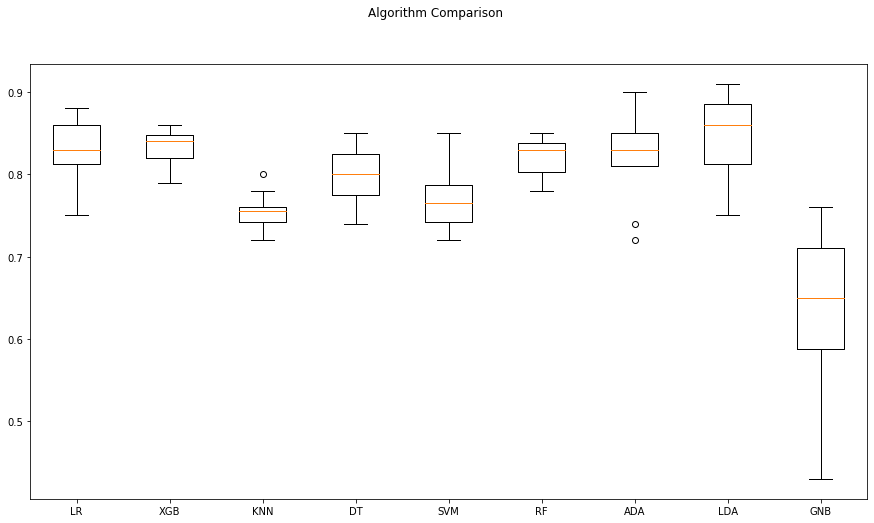

In [152]:
# boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15, 8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()